Customer Clustering!

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
#Get preprocessed final table
cust_data = pd.read_csv('https://raw.githubusercontent.com/p33ves/CMPT726-ML-Project/main/processed_datasets/profile_features.csv')
cust_data.head()

,Unnamed: 0,gender,age,cust_id,became_member_on,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,...,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days,customer_type
0,0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1230,1.0,2.0,0.0,...,77.01,3.333333,144.000000,5.0,5.0,0.00,0.500,25.67,0.002439,passive
1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1297,3.0,4.0,4.0,...,159.27,5.454545,137.454545,20.0,20.0,1.00,0.750,22.75,0.005397,active
2,2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,945,2.0,4.0,3.0,...,57.73,7.222222,184.000000,7.0,9.0,0.75,0.500,19.24,0.003175,passive
3,3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,1021,5.0,6.0,6.0,...,36.43,6.764706,163.764706,19.0,24.0,1.00,0.833,12.14,0.002938,active
4,4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,1111,1.0,3.0,2.0,...,15.62,7.333333,192.000000,2.0,5.0,0.67,0.333,3.90,0.003600,passive


In [5]:
cust_data.columns

Index(['Unnamed: 0', 'gender', 'age', 'cust_id', 'became_member_on', 'income',
       'days_as_member', 'Total offer completed', 'Total offer received',
       'Total offer viewed', 'Total transaction', 'offer completed_via_email',
       'offer completed_via_social', 'offer completed_via_mobile',
       'offer completed_via_web', 'offer completed bogo count',
       'offer completed discount count', 'offer received_via_email',
       'offer received_via_social', 'offer received_via_mobile',
       'offer received_via_web', 'offer received bogo count',
       'offer received discount count', 'offer received informational count',
       'offer viewed_via_email', 'offer viewed_via_social',
       'offer viewed_via_mobile', 'offer viewed_via_web',
       'offer viewed bogo count', 'offer viewed discount count',
       'offer viewed informational count', 'Total transaction amount',
       'avg_difficulty', 'avg_duration', 'total_reward_received',
       'total_reward_defined', 'total_view_

In [7]:
#dropping columns that are not required for clustering
cust_data.drop(['Unnamed: 0','cust_id','became_member_on', 'total_view_ratio', 'total_completion_ratio', 'customer_type', 'Total transaction amount', 'transactions_per_membership_days'], axis=1, inplace=True)
cust_data.sample(5)

,gender,age,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,...,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,avg_transaction_amt
8767,M,19,54000.0,1060,2.0,4.0,4.0,18.0,2.0,2.0,...,4.0,3.0,2.0,2.0,0.0,8.100000,180.0,5.0,20.0,2.93
6917,F,63,90000.0,1573,2.0,4.0,4.0,10.0,2.0,1.0,...,3.0,4.0,2.0,1.0,1.0,11.000000,151.2,15.0,25.0,22.90
1659,F,59,49000.0,1443,5.0,5.0,2.0,9.0,5.0,2.0,...,2.0,1.0,1.0,1.0,0.0,7.583333,168.0,25.0,25.0,15.67
13421,M,62,90000.0,1393,3.0,3.0,3.0,9.0,3.0,2.0,...,3.0,2.0,2.0,1.0,0.0,8.333333,192.0,17.0,17.0,27.24
8937,F,77,92000.0,1710,2.0,5.0,5.0,12.0,2.0,2.0,...,5.0,2.0,2.0,0.0,3.0,3.750000,112.0,15.0,15.0,24.68


In [8]:
#Conerting genders into numeric data
cust_data['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [9]:
cust_data['gender'].replace({'M':0, 'F':1,'O':2},inplace=True)
cust_data.head()

,gender,age,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,...,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,avg_transaction_amt
0,1,55,112000.0,1230,1.0,2.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.333333,144.000000,5.0,5.0,25.67
1,1,75,100000.0,1297,3.0,4.0,4.0,7.0,3.0,2.0,...,4.0,2.0,3.0,0.0,1.0,5.454545,137.454545,20.0,20.0,22.75
2,0,68,70000.0,945,2.0,4.0,3.0,3.0,2.0,1.0,...,3.0,3.0,1.0,2.0,0.0,7.222222,184.000000,7.0,9.0,19.24
3,0,65,53000.0,1021,5.0,6.0,6.0,3.0,5.0,3.0,...,6.0,6.0,4.0,2.0,0.0,6.764706,163.764706,19.0,24.0,12.14
4,0,58,51000.0,1111,1.0,3.0,2.0,4.0,1.0,1.0,...,2.0,2.0,0.0,2.0,0.0,7.333333,192.000000,2.0,5.0,3.90


In [10]:
#Standardscaler to scale the data
cust_data_scaled = StandardScaler().fit_transform(cust_data)
cust_data_scaled

array([[ 1.06355702,  0.03488876,  2.15741893, ..., -0.62221469,
        -1.64418768,  0.65169175],
       [ 1.06355702,  1.18543027,  1.60180089, ...,  1.01514395,
         0.13847664,  0.47484409],
       [-0.84253979,  0.78274074,  0.2127558 , ..., -0.40390021,
        -1.16881053,  0.2622635 ],
       ...,
       [-0.84253979, -0.31027369,  0.35166031, ..., -1.16800091,
        -1.64418768, -0.60198861],
       [ 1.06355702,  1.64564687, -0.71327427, ...,  1.56093017,
         0.73269809, -0.08234718],
       [ 1.06355702,  0.43757829,  0.76837384, ..., -0.29474296,
        -1.28765482,  0.54085914]])

### K Means Clustering to find the number of Customer clusters

In [11]:
#choosing value of k as 12
##for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
scores = []
K_values = range(1,12)
for k in K_values:
    k_means = KMeans(n_clusters = k)
    model = k_means.fit(cust_data)
    scores.append(k_means.inertia_)

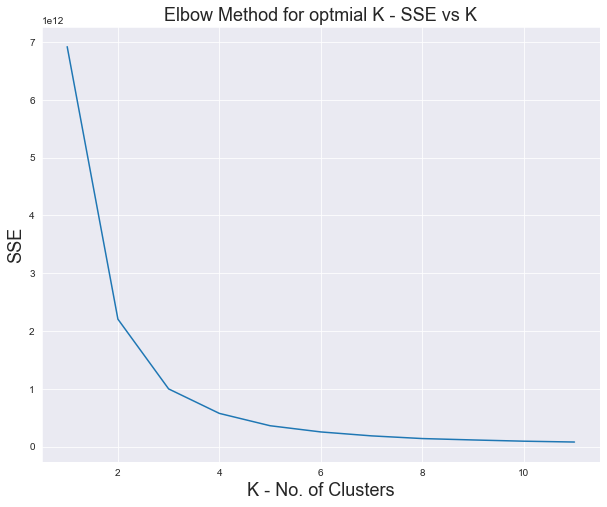

In [17]:
#Elbow plot with a line graph
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
sns.set_style('darkgrid')
chart=sns.lineplot(ax=ax, x=K_values, y =scores)
plt.xlabel("K - No. of Clusters", fontsize=18)
plt.ylabel("SSE", fontsize =18)
plt.title("Elbow Method for optmial K - SSE vs K", fontsize =18)

plt.show(chart)

### From the above graph we see that the elbow point is at k=5

In [13]:
#We can verify this by calculating the Silhouette coefficient and Calinski Harabasz Scores for k=5 and other values
#k=5
k_means = KMeans(n_clusters = 5)
k_means.fit(cust_data)
predicted = k_means.predict(cust_data)
labels = k_means.labels_
sc = metrics.silhouette_score(cust_data, labels, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(cust_data, labels)
print("k = 5, The silhouette_score is :", sc, "Calinski Harabasz Score is: ",ch)


k = 5, The silhouette_score is : 0.5689878380024604 Calinski Harabasz Score is:  67622.23964567596


In [14]:
#k=4
k_means = KMeans(n_clusters = 4)
k_means.fit(cust_data)
predicted = k_means.predict(cust_data)
labels = k_means.labels_
sc = metrics.silhouette_score(cust_data, labels, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(cust_data, labels)
print("k = 4, The silhouette_score is :", sc, "Calinski Harabasz Score is: ",ch)


k = 4, The silhouette_score is : 0.5590122765162933 Calinski Harabasz Score is:  54655.536070976545


### Both the scores are greater for k=5, so we will categorize customer into 5 clusters